## 와인 데이터
- 와인의 등급에 영향을 미치는 성분들이 어떤 것들이 있는지 실험/연구 할 수 있는 데이터

Q.
- 화이트 와인은 달까? (데이트 할 때 많이 마시잖아)
- 와인의 등급에 영향을 미치는 성분들은 어떤 것들이 있을까? => corr()
- 9등급 와인과 3등급 와인의 각각 성분 차이가 가장 큰 값은 무엇인가?
- 알콜 도수가 높을수록 와인 등급은 높아지는가?

1. 라이브러리 import / 데이터 로드
2. 피처 엔지니어링 (데이터 EDA)
3. 모델 설정 및 학습
4. MLflow 설정 및 실행 => 메트릭, 파람 기록
5. 모델 결과 출력 및 모델 저장

In [15]:
# 필요한 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 데이터 로드
path = 'winequality.csv'   # 절대/상대 경로
df = pd.read_csv(path, index_col=0) # 0, 1 : False, True
df.head()

# 구현 100% - 70%로 줄이고, 30%는 이론적인 공부
# FastAPI가 빠른 이유는 비동기

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [7]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,799.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,399.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,799.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1198.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1598.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
# 우리 가게의 와인이 등급별로 몇개씩 있지?
# - 5등급은 총 몇 개? 9등급은?
# groupby(), value_counts()

df['quality'].value_counts().sort_index(ascending=False)    #정렬

df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [18]:
!pip install seaborn

<Axes: >

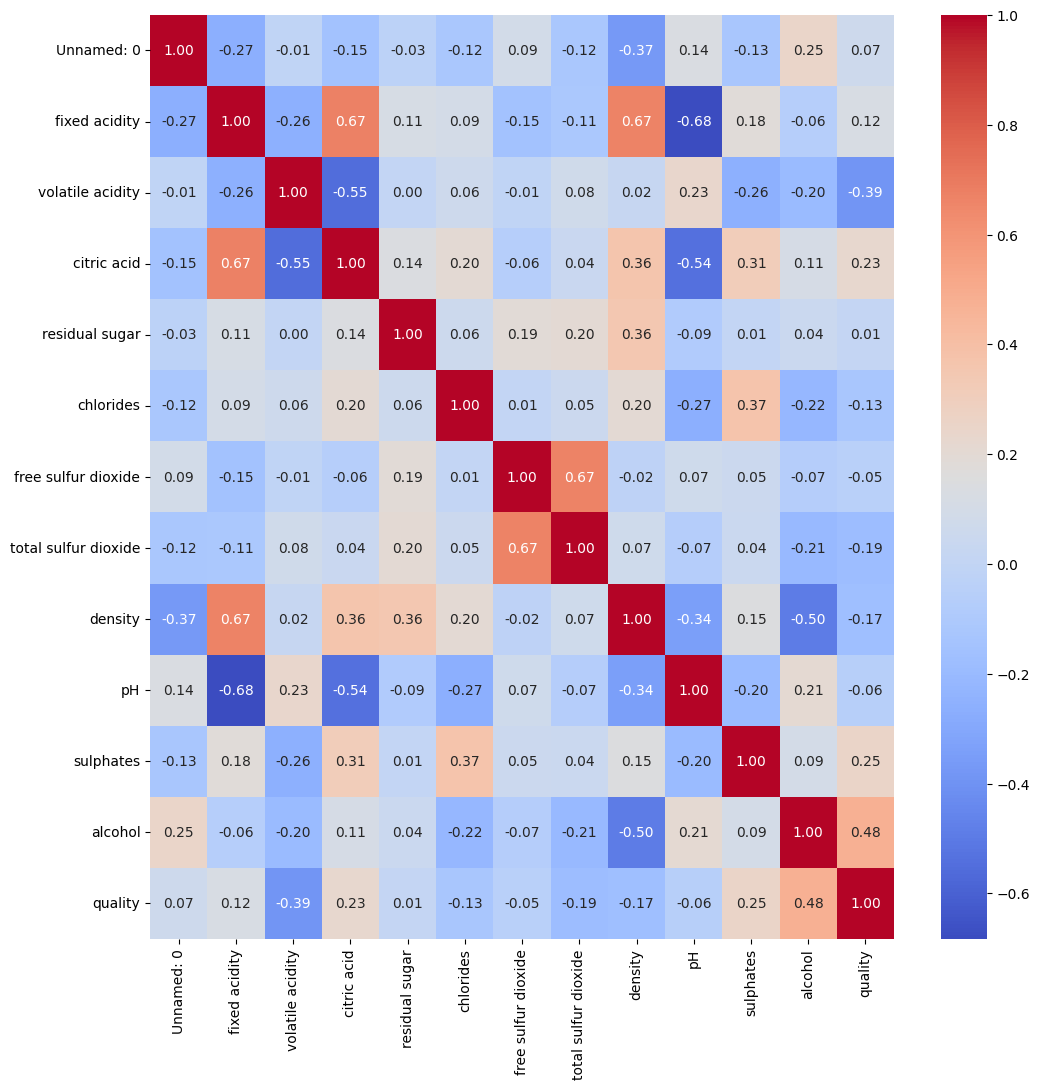

In [20]:
# 와인의 등급에 영향을 미치는 성분들은 어떤 것이 있을까?
corr = df.corr(numeric_only=True)

# 아래 표의 결과를 히트맵으로 그려봅시다.
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [24]:
# 와인의 등급별로 평균 알코올 도수와 평균 당도를 구하시오.
df.groupby('quality')[['residual sugar', 'alcohol']].mean()

# outlier - 이상치 제거


,residual sugar,alcohol
quality,,
3,2.635000,9.955000
4,2.694340,10.265094
5,2.528855,9.899706
6,2.477194,10.629519
7,2.720603,11.465913
8,2.577778,12.094444


In [26]:
# 조건부 필터링: fixed acifity, pH가 3 이상, 4이상인 데이터만 추출하시오.

df[(df['fixed acidity'] >= 3) & (df['pH'] >= 4)]  # boolean indexing

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1316,1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1321,1321,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


In [29]:
# 모델링
# (1) 학습데이터(모의고사), 실습데이터(수능) 분리
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25)

# (2) 분리한 데이터를 csv 형태로 저장
train.to_csv('wine_train.csv')
test.to_csv('wine_test.csv')

In [30]:
# (3) 학습용, 테스트용 데이터 로드 => 피쳐데이터랑 레이블(타겟) 데이터

X_train = train.drop(['quality'], axis=1)
X_test = test.drop(['quality'], axis=1)

y_train = train['quality']
y_test = test['quality']

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((1199,), (400,))

In [48]:
# (4) mlflow load
import mlflow
import mlflow.sklearn
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 수정
from itertools import product

mlflow.autolog()

mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment(experiment_name='wine_quality_experiment')

alpha = [0.2, 0.5, 0.7, 1.0]
l1_ratio = [0.2, 0.3, 0.7, 1.0]

# 4x4 = 16

# for i in alpha:
#     for l in l1_ratio:

for a, l in product(alpha, l1_ratio):
    with mlflow.start_run(nested=True):
        # lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=123)
        lr = ElasticNet(alpha=a, l1_ratio=l, random_state=123)
        lr.fit(X_train, y_train)

        predict = lr.predict(X_test)

        # 모델 성능 평가 => SageMaker
        rmse = np.sqrt(mean_squared_error(y_test, predict)) # MSE
        mae = mean_absolute_error(y_test, predict)
        r2 = r2_score(y_test, predict)

        # log 기록
        mlflow.log_param('alpha', a)
        mlflow.log_param('l1_ratio', l)

        mlflow.log_metric('rmse', rmse)
        mlflow.log_metric('mae', mae)
        mlflow.log_metric('r2', r2)

        mlflow.sklearn.log_model(lr, 'wine_quality_model')

2024/08/19 12:48:30 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/08/19 12:48:30 INFO mlflow.tracking.fluent: Experiment with name 'wine_quality_experiment' does not exist. Creating a new experiment.
2024/08/19 12:48:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/a-07/Desktop/mlops-project/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https

In [49]:
from itertools import product

alpha = [0.2, 0.5, 0.7, 1.0]
l1_ratio = [0.2, 0.3, 0.7, 1.0]

for a, l in product(alpha, l1_ratio):
    print(a,l)

0.2 0.2
0.2 0.3
0.2 0.7
0.2 1.0
0.5 0.2
0.5 0.3
0.5 0.7
0.5 1.0
0.7 0.2
0.7 0.3
0.7 0.7
0.7 1.0
1.0 0.2
1.0 0.3
1.0 0.7
1.0 1.0


In [ ]:
# Model Serving
# http://127.0.0.1:5000/#/experiments/611245340918531633/runs/f587c91b478f429ababb42665f3afda0

# mlflow models serve -m ./mlartifacts/611245340918531633/f587c91b478f429ababb42665f3afda0/artifacts/model -p 5002 --no-conda

In [51]:
# 데이터 셋 준비 => 요청
import requests
import json

test_data = pd.read_csv('wine_test.csv', index_col=0)
input_data = test_data.drop(['quality'], axis=1)[:10] # json - streamit(prototyping tool)

data = {
    'dataframe_split': input_data.to_dict(orient='split')
}

url = 'http://127.0.0.1:5002/invocations'


headers = {'Content-Type':'application/json'}
res = requests.post(url, headers=headers, data=json.dumps(data))

result = res.json()

for i in result['predictions']:
    print(i)

# frontend - REST API 형태로 서버에 요청(json)

5.500130619106543
5.648337108023469
5.711170868753853
5.810355490545097
5.4168565221371745
5.551079913615305
5.665281846660536
5.580354664711252
5.797941977387388
5.66092111798415
